In [ ]:
The package Market provides a simple illustration of the Australia Interest Rates market. The package uses Scipy for Newton-Raphson optimization
1. To Access the Jupyter notebook, please use the one named 'Market Notebook'
2. A Spreadsheet with xlwings added-in is also attached

Usage
1. Create a generic Market handle, user is able to define which curves to be built in the collection
from either the Notebook or the Excel Add-in
2. Provides 2 ways of calculating DV01 Shock, pillar and zero shocks


In [1]:
#Build the market
import market as mkt
import pandas as pd
valueDate = pd.to_datetime('31/12/2021',format = '%d/%m/%Y')
baseMarket = mkt.Create('baseMarket',valueDate)
baseMarket.GetItems()

AUDBasis6m3m6M 2022-07-04 has another pillar having the same maturity
AUDBILL6M 2022-07-04 has another pillar having the same maturity
AUDBasis3m1m6M 2022-07-04 has another pillar having the same maturity
AUDBILL6M 2022-07-04 has another pillar having the same maturity
Done in 13.5602 seconds


,Currency|ItemType,Items
0,AUD|YieldCurve,AUDSwap
1,GBP|YieldCurve,GBPOIS
2,JPY|YieldCurve,JPYOIS
3,USD|YieldCurve,USDOIS
4,AUD|YieldCurve,AUDBondGov
5,AUD|IndexFixing,AUCPI
6,USD|CreditCurve,USDCreditSwap
7,AUD|InflationCurve,AUD.Bond.Gov.BEI
8,AUD|PriceCurve,IaaSpread
9,AUD|YieldCurve,AUDSwap3m


<AxesSubplot:xlabel='Dates'>

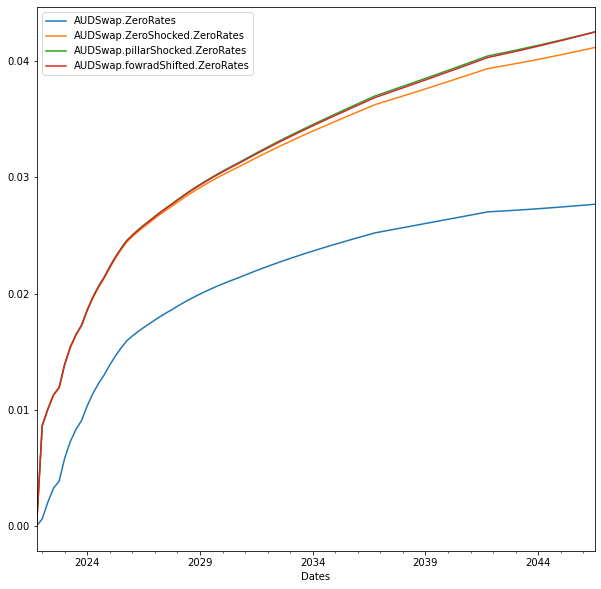

In [17]:
import dateutil.relativedelta 
date_list = [valueDate + dateutil.relativedelta.relativedelta(months=3*x) for x in range(100)] 
audSwap = baseMarket['audswap']
zeroShockedCurve = audSwap.CreateShockedCurve('zero',shockAmount = 0.008)
pillarShockedCurve = audSwap.CreateShockedCurve('pillar',shockAmount = 0.008)
fwdShockedCurve = audSwap.CreateShockedCurve('foward',shockAmount = 0.008, period = '3m', yearBasis = 'acton365f')
df = mkt.Charts([audSwap,zeroShockedCurve,pillarShockedCurve,fwdShockedCurve], 'zero', date_list,'3m')
df.plot(figsize=(10,10))

<AxesSubplot:xlabel='Dates'>

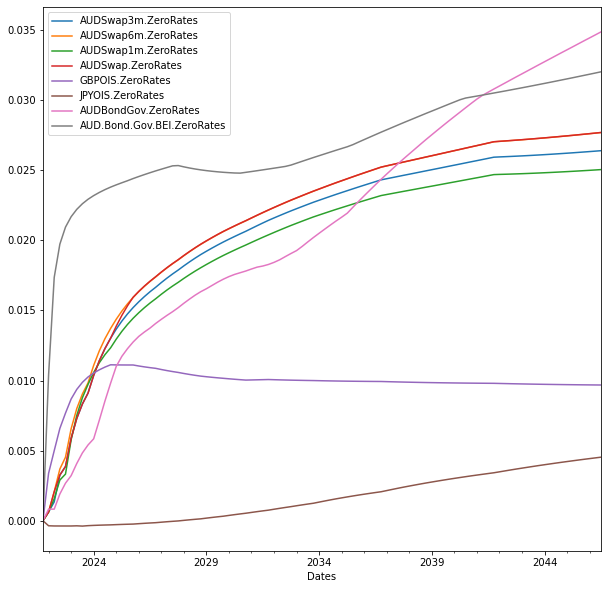

In [10]:
#Curve Charts
import dateutil.relativedelta 
date_list = [valueDate + dateutil.relativedelta.relativedelta(months=3*x) for x in range(100)] 
#zero rates
df = mkt.Curve.Charts(list(baseMarket.marketItems.values()), 'zero', date_list,'3m')
df.plot(figsize=(10,10))

<AxesSubplot:xlabel='Dates'>

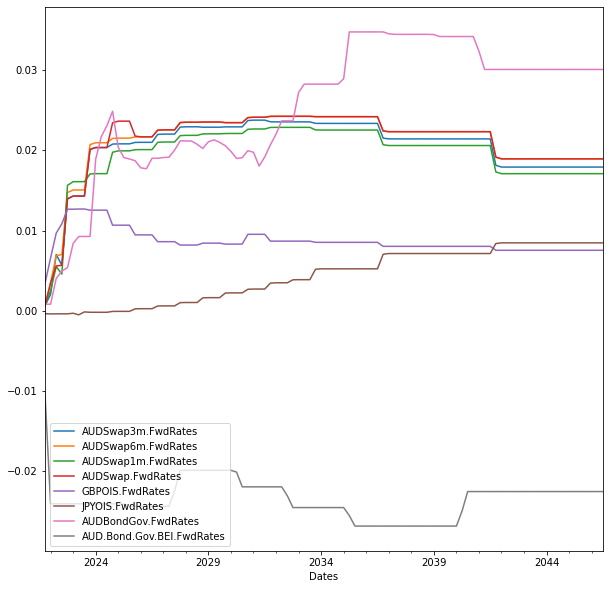

In [42]:
#forward rates
df = mkt.Curve.Charts(list(baseMarket.marketItems.values()), 'fwd', date_list,'3m')
df.plot(figsize=(10,10))

In [21]:
#PillarShock DV01 at 1mil notional

audSwap = baseMarket['AUDSwap']
df = audSwap.Dv01AtEachpillar('pillar')
#print(df.to_markdown())
for pillar in audSwap.pillars:
    for k,v in pillar.__dict__.items():
        if k == 'dateAdjuster':
            v[k] = pillar.dateAdjuster.calendar

TypeError: 'DateAdjuster' object does not support item assignment

In [13]:
audSwap = baseMarket['AUDSwap']
dt = audSwap.Dv01AtEachpillar('pillar')
print(dt.to_markdown(index=False))

| Pillar     |       Delta |
|:-----------|------------:|
| AUDBILL1M  |    -9.58899 |
| AUDBILL2M  |   -17.2598  |
| AUDBILL3M  |   -25.7499  |
| AUDBILL6M  |   -50.6349  |
| AUDSwap1Y  |   -99.8144  |
| AUDSwap2Y  |  -198.555   |
| AUDSwap3Y  |  -296.328   |
| AUDSwap4Y  |  -390.153   |
| AUDSwap5Y  |  -482.411   |
| AUDSwap6Y  |  -572.897   |
| AUDSwap7Y  |  -661.556   |
| AUDSwap8Y  |  -747.932   |
| AUDSwap9Y  |  -832.774   |
| AUDSwap10Y |  -914.947   |
| AUDSwap12Y | -1073.92    |
| AUDSwap15Y | -1298.91    |
| AUDSwap20Y | -1641.1     |
| AUDSwap25Y | -1949.7     |
| AUDSwap30Y | -2233.01    |
| AUDSwap50Y | -3127.14    |
